In [4]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as mp
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
sp=pd.read_csv('/content/drive/MyDrive/Stroke pred/healthcare-dataset-stroke-data.csv')


In [7]:
sp.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
sp.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
sp

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [12]:
sp.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
print(sp['bmi'].mean())

28.893236911794666


In [14]:
bmi=sp['bmi'].mean()
sp

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [15]:
sp['bmi']=sp['bmi'].fillna(bmi)


In [16]:
sp.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
sp

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [18]:
sp1=sp[['id',	'gender',	'age', 'hypertension', 'heart_disease', 'ever_married']]
sp1

,id,gender,age,hypertension,heart_disease,ever_married
0,9046,Male,67.0,0,1,Yes
1,51676,Female,61.0,0,0,Yes
2,31112,Male,80.0,0,1,Yes
3,60182,Female,49.0,0,0,Yes
4,1665,Female,79.0,1,0,Yes
...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes
5106,44873,Female,81.0,0,0,Yes
5107,19723,Female,35.0,0,0,Yes
5108,37544,Male,51.0,0,0,Yes


In [19]:
sp2=sp[['work_type',	'Residence_type',	'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]
sp2

,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Private,Urban,228.69,36.600000,formerly smoked,1
1,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Private,Rural,105.92,32.500000,never smoked,1
3,Private,Urban,171.23,34.400000,smokes,1
4,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...
5105,Private,Urban,83.75,28.893237,never smoked,0
5106,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Private,Rural,166.29,25.600000,formerly smoked,0


In [20]:
display(sp1,sp2)

,id,gender,age,hypertension,heart_disease,ever_married
0,9046,Male,67.0,0,1,Yes
1,51676,Female,61.0,0,0,Yes
2,31112,Male,80.0,0,1,Yes
3,60182,Female,49.0,0,0,Yes
4,1665,Female,79.0,1,0,Yes
...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes
5106,44873,Female,81.0,0,0,Yes
5107,19723,Female,35.0,0,0,Yes
5108,37544,Male,51.0,0,0,Yes


,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Private,Urban,228.69,36.600000,formerly smoked,1
1,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Private,Rural,105.92,32.500000,never smoked,1
3,Private,Urban,171.23,34.400000,smokes,1
4,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...
5105,Private,Urban,83.75,28.893237,never smoked,0
5106,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Private,Rural,166.29,25.600000,formerly smoked,0


In [21]:
sp3=pd.merge(sp1,sp2 , left_index=True, right_index=True)
sp3

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


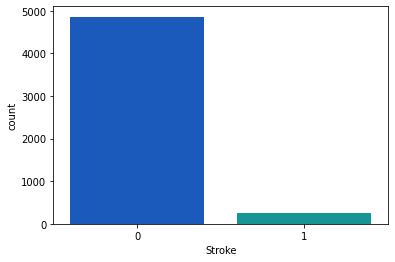

In [25]:
sns.countplot(x = sp['stroke'], palette= 'winter')
mp.xlabel('Stroke');

In [24]:
sp3.to_excel('final_merge.xlsx')